In [16]:
import numpy as np, matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, FuncFormatter
from plot_styles import set_plotstyles
set_plotstyles()
%config InlineBackend.figure_format = 'retina'

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
freqs = np.linspace(0.1, 0.2, 1024) # GHz
tau = 23 #ns

data = np.exp(-2 * np.pi * 1j * tau * freqs)

In [6]:
noise = np.random.normal(size = len(data))

In [9]:
# Noise applied to data (before np.angle)
noisey_data_0 = np.angle(data + noise) 

In [10]:
# Noise applied to data (after np.angle)
noisey_data_1 = np.angle(data) + noise

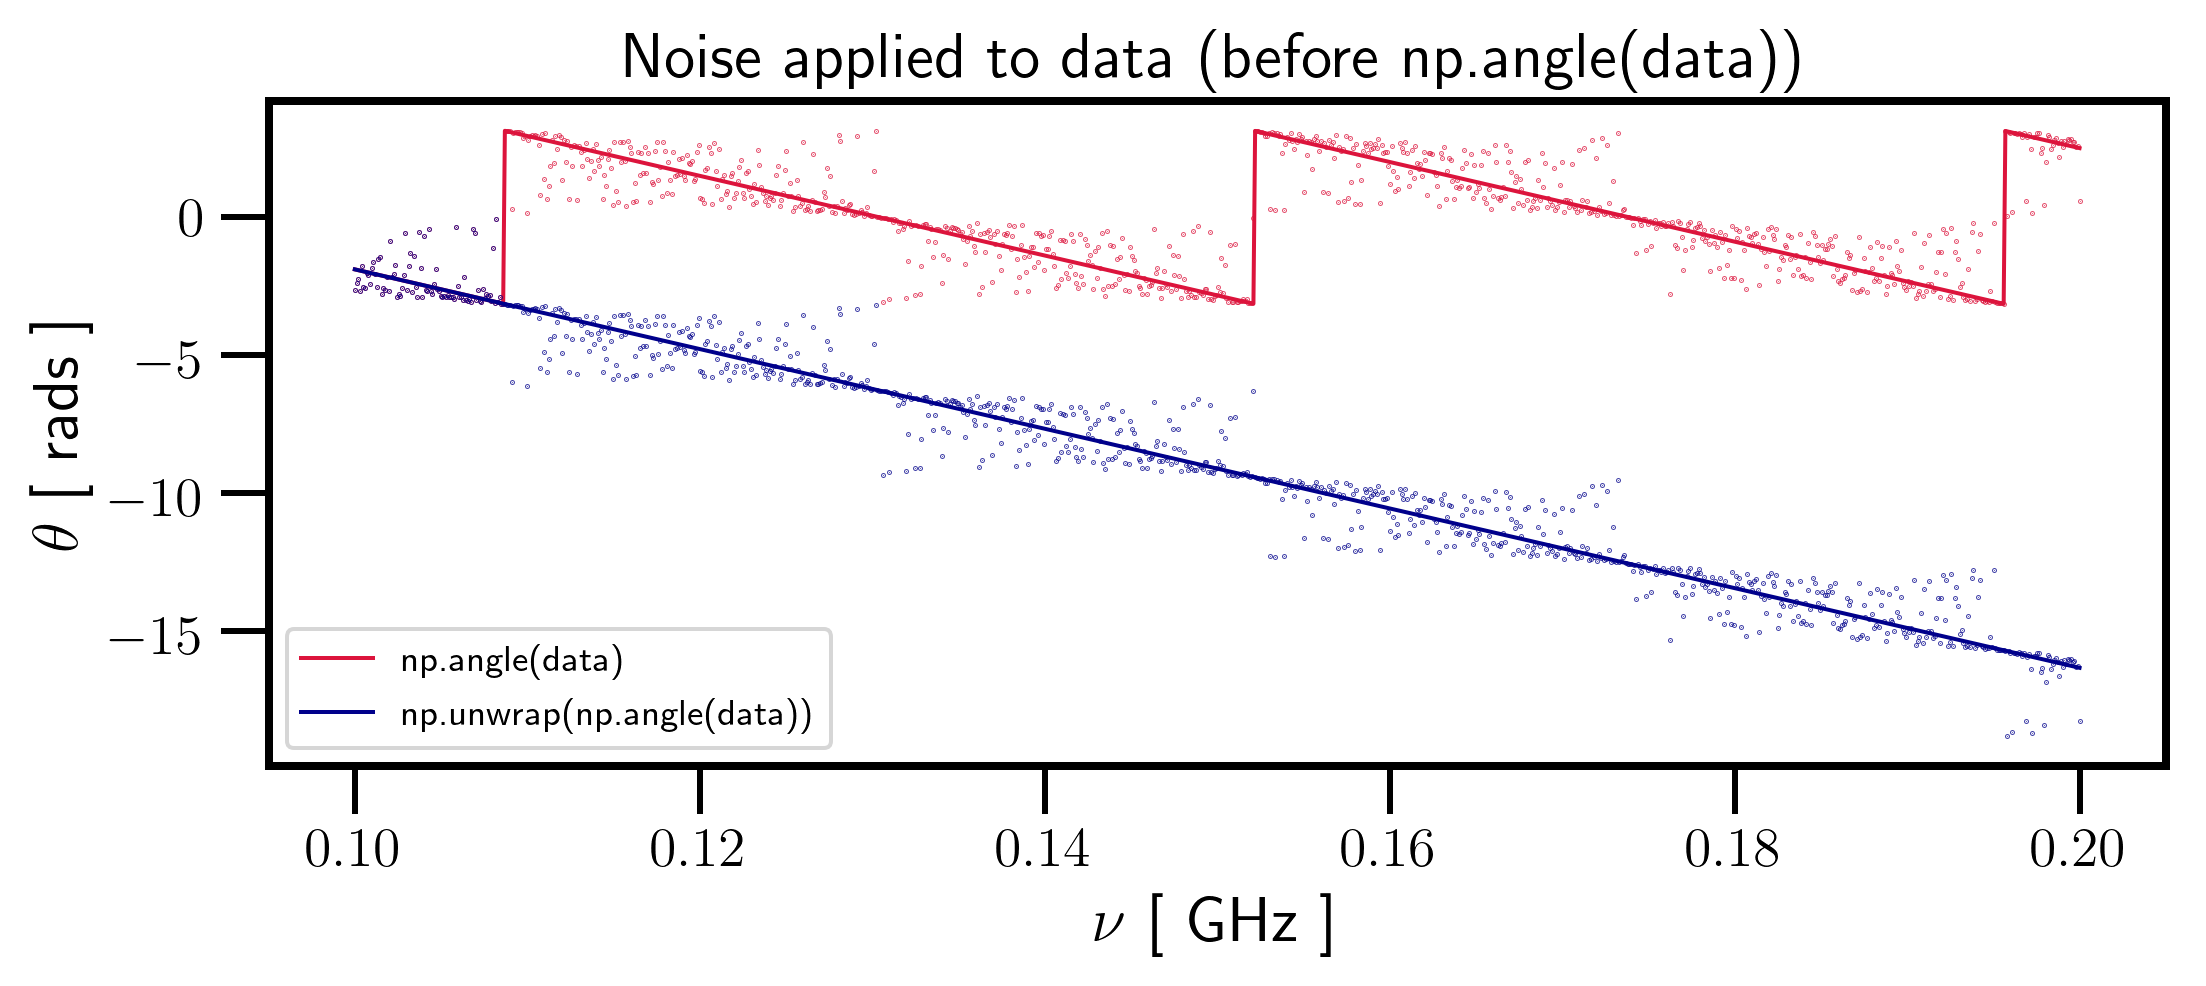

In [11]:
# plot of noisy data, wrapped and unwrapped

fig, ax = plt.subplots(figsize = (8.5, 3), dpi = 144)

ax.plot(freqs, np.angle(data),
        linewidth = 1,
        color = 'crimson', label = 'np.angle(data)')

ax.plot(freqs, noisey_data_0,
        ls = 'None', marker = '.', markersize = 0.5, alpha = 0.75,
        linewidth = 0.5,
        color = 'crimson')

ax.plot(freqs, np.unwrap(np.angle(data)), 
        linewidth = 1,
        color = 'darkblue', label = 'np.unwrap(np.angle(data))')


ax.plot(freqs, np.unwrap(noisey_data_0), 
        ls = 'None', marker = '.', markersize = 0.5, alpha = 0.75,
        linewidth = 0.5,
        color = 'darkblue')

ax.set_ylabel(r'$\theta$ [ rads ]')
ax.set_xlabel(r'$\nu$ [ GHz ]')


# ax.yaxis.set_major_formatter(FormatStrFormatter('%g$\pi$'))
ax.set_title('Noise applied to data (before np.angle(data))')

# ax.set_ylim(-6,2)
ax.legend(loc = 'lower center', fontsize = 9)
plt.show()




noise applied to np.angle(data)

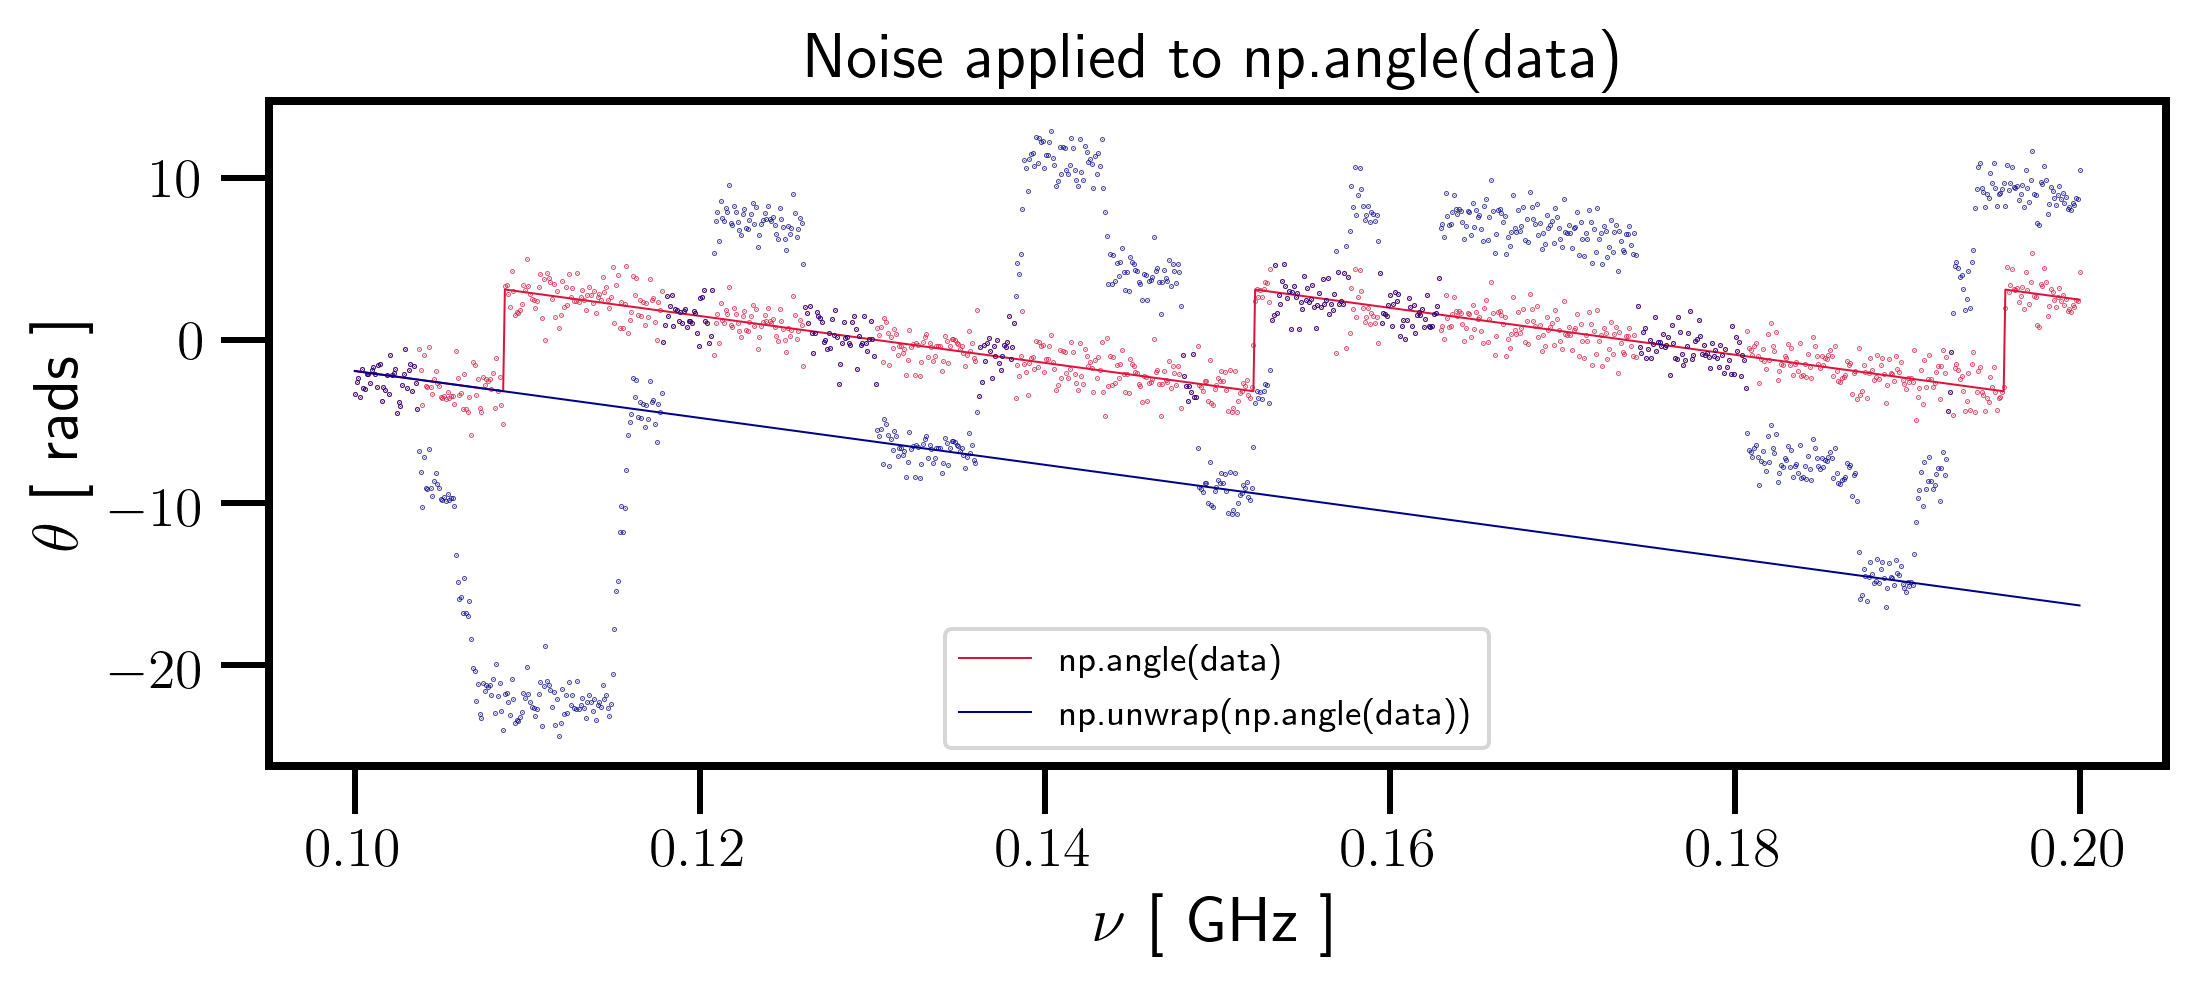

In [35]:
# plot of 'perfect' data wrapped and unwrapped

angle_data = np.angle(data)
noise = np.random.normal(size = len(angle_data))

nangle_data = angle_data + noise

fig, ax = plt.subplots(figsize = (8.5, 3), dpi = 144)

ax.plot(freqs, np.angle(data),
        linewidth = 0.5,
        color = 'crimson', label = 'np.angle(data)')

ax.plot(freqs, noisey_data_1,
        ls = 'None', marker = '.', markersize = 0.5, alpha = 0.75,
        color = 'crimson')


ax.plot(freqs, np.unwrap(np.angle(data)), 
        linewidth = 0.5,
        color = 'darkblue', label = 'np.unwrap(np.angle(data))')

ax.plot(freqs, np.unwrap(noisey_data_1), 
        ls = 'None', marker = '.', markersize = 0.5, alpha = 0.75,
        color = 'darkblue')

ax.set_ylabel(r'$\theta$ [ rads ]')
ax.set_xlabel(r'$\nu$ [ GHz ]')


ax.set_title('Noise applied to np.angle(data)')

# ax.set_ylim(-6,2)
ax.legend(loc = 'lower center', fontsize = 9)

# scale = 1/np.pi
# ticks = FuncFormatter(lambda x, pos: '{0:g}'.format(x*scale))
# ax.yaxis.set_major_formatter(ticks)
# ax.yaxis.set_major_formatter(FormatStrFormatter('%g $\pi$'))
# ax.yaxis.set_major_locator(MultipleLocator(base=np.pi))
plt.show()


